In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### setup inline format style of tables

In [4]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [110]:
sns.set_palette("deep", desat=0.6)
sns.set_context(rc={"figure.figsize": (8,4)})

In [6]:
data = pd.read_csv('Data_Shared_WorkingFile.csv')
data.head()

,Entity,Run_On_Ent,Lot,Op,Error,Feature1,Feature2,Feature3,Feature4,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Fam_Type,DIC_Design
0,201A,1,201AKMON,3514,NaN,250,70,1.5,4.0,0,1,0,0,1,NaN,NaN
1,201A,2,201AKMON,3514,NaN,250,70,1.5,4.0,0,1,0,0,1,NaN,NaN
2,201A,3,201AERAT,3504,NaN,600,15,3.0,8.0,1,0,0,0,0,NaN,NaN
3,201A,4,201AKMON,3514,NaN,250,70,1.5,4.0,0,1,0,0,1,NaN,NaN
4,201A,5,201AKMON,3514,NaN,250,70,1.5,4.0,0,1,0,0,1,NaN,NaN


### Checking out the shape of the data file.

In [7]:
print ("Data Shape:", data.shape)

Data Shape: (71568, 16)


### We can see that there are roughly 4k critical data pts available.   Minimum abs error is best so it makes sense that the process has Error mean close to zero at -0.07.  1s = ~0.9

In [8]:
data.dtypes

Entity         object
Run_On_Ent      int64
Lot            object
Op              int64
Error         float64
Feature1        int64
Feature2        int64
Feature3      float64
Feature4      float64
Attribute1      int64
Attribute2      int64
Attribute3      int64
Attribute4      int64
Attribute5      int64
Fam_Type       object
DIC_Design     object
dtype: object

In [9]:
data.Error.describe()

count    3985.000000
mean       -0.073852
std         0.900633
min        -7.700000
25%        -0.544000
50%        -0.048000
75%         0.453000
max         6.467000
Name: Error, dtype: float64

### see what columns have data missing

In [10]:
nulls = pd.DataFrame(data.isnull().sum().sort_values(ascending=False))
nulls.columns = ['Count_Nulls']
nulls.index.name = 'Data_Column'
nulls

,Count_Nulls
Data_Column,
Error,67583
DIC_Design,65961
Fam_Type,65961
Attribute5,0
Attribute4,0
Attribute3,0
Attribute2,0
Attribute1,0
Feature4,0


### We can see the Error of the whole entire data set is normal Gaussian distribution centered about zero.

Error skew: -0.342304438317


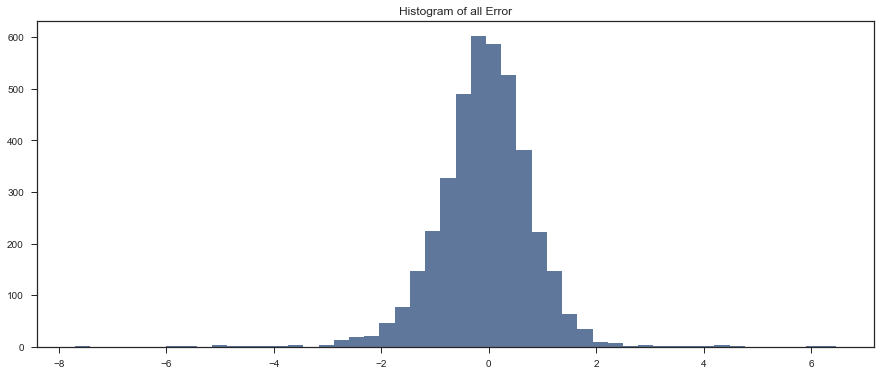

In [71]:
print('Error skew:',data.Error.skew())
plt.figure(figsize=(15,6))
plt.hist(data.Error.dropna(),bins=50)
plt.title('Histogram of all Error')

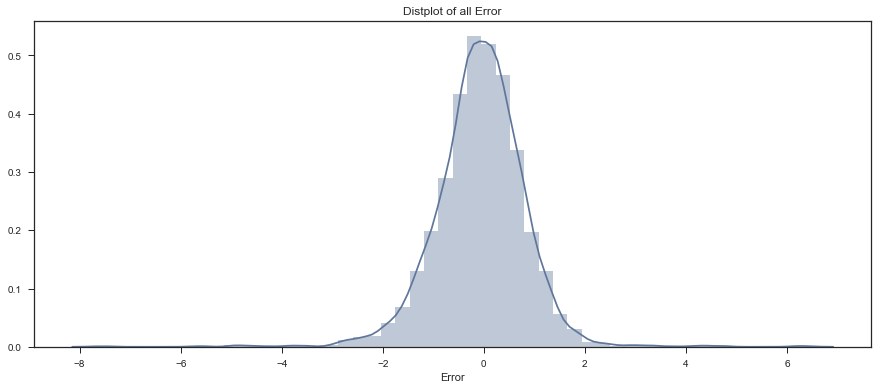

In [111]:
plt.figure(figsize=(15,6))
sns.distplot(data.Error.dropna(), bins = 50)
plt.title('Distplot of all Error')

### Explore data sets by Entity.  Common in production environments to break out and explore data by tool or entity to see if they are performing similarly.

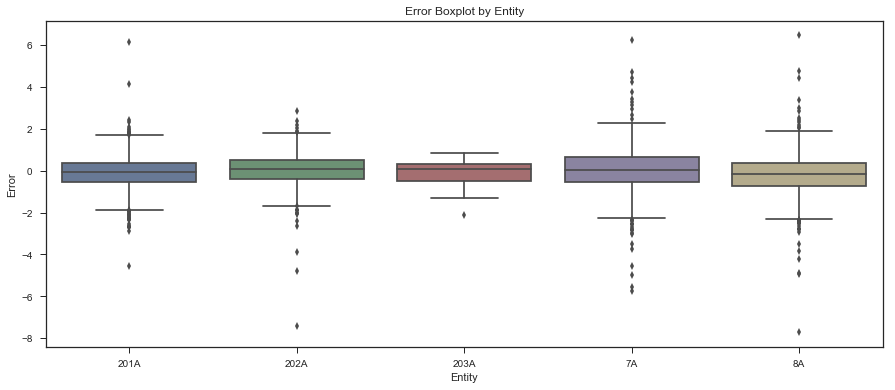

In [112]:
#boxplots by entity
datacompare = data.dropna()
plt.figure(figsize=(15,6))
sns.boxplot(x = 'Entity', y = 'Error', data = datacompare)
plt.title('Error Boxplot by Entity')

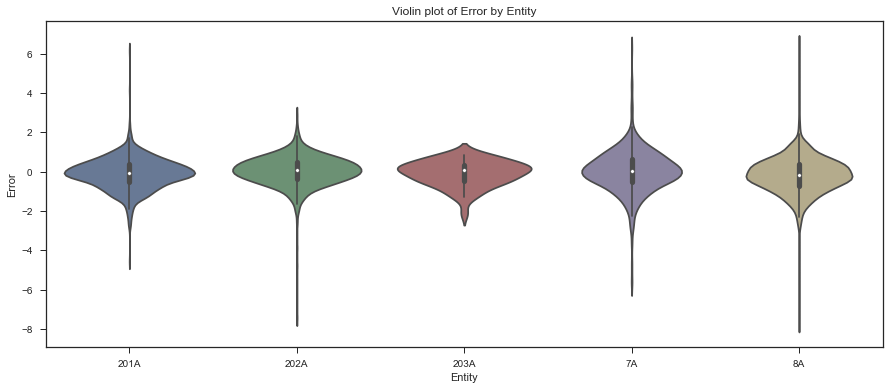

In [113]:
plt.figure(figsize=(15,6))
sns.violinplot(x = 'Entity', y = 'Error', data = datacompare)
plt.title('Violin plot of Error by Entity')

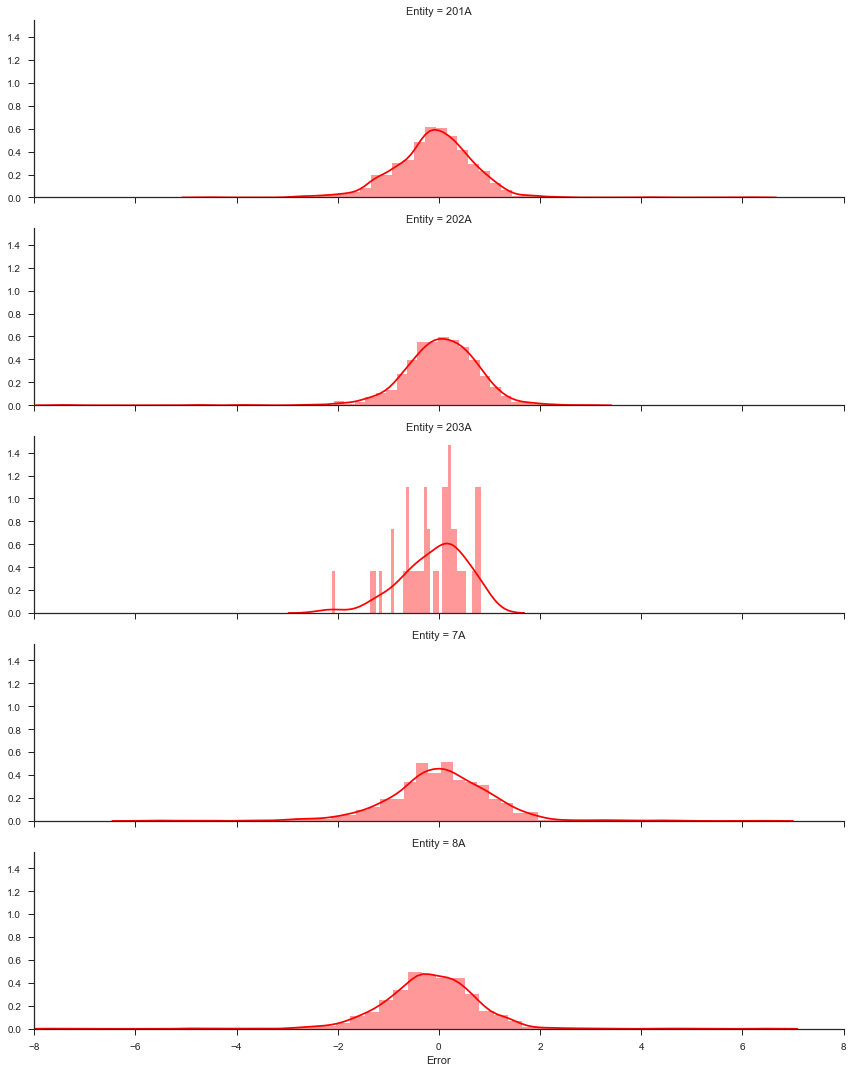

In [107]:
#very noteworthy that Entity = 203A does not have as uniform a dataset as the other entities.  possibly remove from later 
#models to explore impact.
g = sns.FacetGrid(datacompare, row = "Entity", aspect = 4, xlim = (-8,8))
g.map(sns.distplot, 'Error', bins = 50, color = 'r')

### Create time series of a single Entity run (where we see Run_On_Ent restart at 1).  This will be used as our toy dataset.  

In [85]:
#create toy data sets by entity, we will work w toy7 which has the most rows and a very normal distribution
toy7_df = data.loc[data['Entity'] == '7A']
toy8_df = data.loc[data['Entity'] == '8A']
toy201_df = data.loc[data['Entity'] == '201A']
toy202_df = data.loc[data['Entity'] == '202A']
toy203_df = data.loc[data['Entity'] == '203A']
toy7_df

,Entity,Run_On_Ent,Lot,Op,Error,Feature1,Feature2,Feature3,Feature4,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Fam_Type,DIC_Design
27805,7A,1,246186,3524,NaN,800,12,1.5,5.0,0,1,0,1,1,NaN,NaN
27806,7A,2,7A_CLEAN,3504,NaN,600,0,8.0,0.0,0,0,0,0,1,NaN,NaN
27807,7A,3,245352,3524,NaN,800,12,1.5,5.0,0,1,0,0,1,NaN,NaN
27808,7A,4,246782,3524,NaN,800,12,1.5,5.0,0,1,0,0,1,NaN,NaN
27809,7A,5,245739,3534,NaN,800,15,6.0,5.0,1,1,0,0,0,NaN,NaN
27810,7A,6,245927,3504,NaN,800,20,1.5,5.0,1,1,0,1,0,NaN,NaN
27811,7A,7,7AERAT,3504,NaN,600,15,3.0,8.0,1,0,0,0,0,NaN,NaN
27812,7A,8,7ACMON,3514,NaN,250,70,1.5,4.0,0,1,0,0,1,NaN,NaN
27813,7A,9,246621,3524,NaN,800,12,1.5,5.0,0,1,0,1,1,NaN,NaN
27814,7A,10,246676,3524,NaN,800,12,1.5,5.0,0,1,0,1,1,NaN,NaN


### Focusing on Toy7 data set

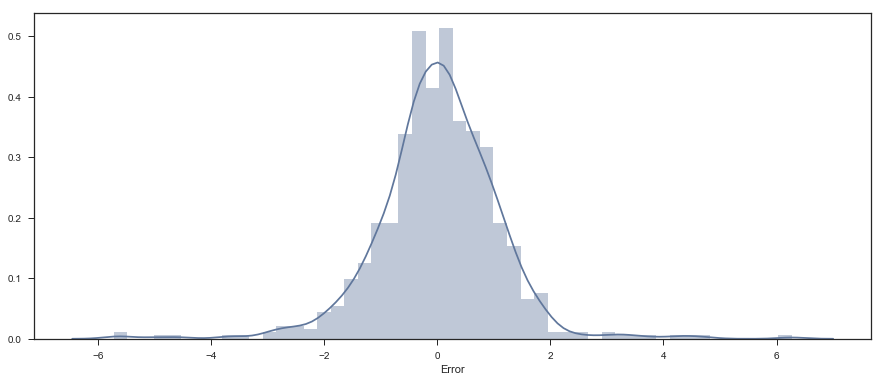

In [108]:
#we can see the toy dataset is also a well formed Gaussian centered about 0.
plt.figure(figsize=(15,6))
sns.distplot(toy7_df.Error.dropna(), bins = 50)

In [109]:
toy7_df.Error.describe()

count    764.000000
mean       0.017473
std        1.086037
min       -5.725000
25%       -0.524750
50%        0.046500
75%        0.648000
max        6.269000
Name: Error, dtype: float64

### the time series scatter plot is significant in that it shows a couple of significant things.  we can see the mean and variability are roughly stable throughout the life of the dataset.  Variance is homoscedastic although it may tighten slightly in the dataset after 15k.  Also, the customer's critical data does not actually start until roughly 4k data pts.  

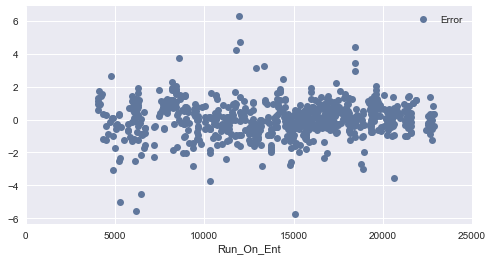

In [18]:
toy7_df.plot(x = 'Run_On_Ent', y = 'Error', xlim = [0, 25000], style = 'o')

### Begin data analysis by lagging all features and attributes from 1-20 lags and creating a new df from this combined with all the "Error" measurements in the toy7 dataset.  The lag was chosen with input from customer process data expert.  Experimental evidence points to lagging influence being confined to most preceding runs (possibly only several runs).  Therefore, we cap the lagging to 20 and increment by single runs.   Intitial analysis will be confined to exploring each attr/variable independantly, but later will expand to combinations.

In [114]:
#build a new dataframe that lags over each feature.  (default lag = 2 if none provided)
def FeatureLagging (datasystem, lag = 2, dropna = False):
    if type(datasystem) is pd.DataFrame:
        new_dict = {}
        for col_name in datasystem:
            if "Feature" in col_name or "Attribute" in col_name:
                new_dict[col_name] = datasystem[col_name]
                for xshift in range(1, lag + 1):
                    new_dict['%s_lag%d' % (col_name, xshift)] = datasystem[col_name].shift(xshift)
            else: 
                pass
            res = pd.DataFrame(new_dict, index = datasystem.index)
            
    else:
        print('error - must be 2D dataframe')
        return None

    if dropna == True:
        return res.dropna()
    else: return res


In [62]:
#use sequential run_on_ent as our row index
s = toy7_df.set_index('Run_On_Ent')
s.head()

,Entity,Lot,Op,Error,Feature1,Feature2,Feature3,Feature4,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Fam_Type,DIC_Design
Run_On_Ent,,,,,,,,,,,,,,,
1,7A,246186,3524,NaN,800,12,1.5,5.0,0,1,0,1,1,NaN,NaN
2,7A,7A_CLEAN,3504,NaN,600,0,8.0,0.0,0,0,0,0,1,NaN,NaN
3,7A,245352,3524,NaN,800,12,1.5,5.0,0,1,0,0,1,NaN,NaN
4,7A,246782,3524,NaN,800,12,1.5,5.0,0,1,0,0,1,NaN,NaN
5,7A,245739,3534,NaN,800,15,6.0,5.0,1,1,0,0,0,NaN,NaN


In [72]:
#Use feature lagging function to shift all attributes/features and align with Error into a new df
lag7_df = FeatureLagging(s,lag=20,dropna=False)
lag7_df.insert(0, 'Error', s.Error)
lag7_df#.Error.describe()

,Error,Attribute1,Attribute1_lag1,Attribute1_lag10,Attribute1_lag11,Attribute1_lag12,Attribute1_lag13,Attribute1_lag14,Attribute1_lag15,Attribute1_lag16,...,Feature4_lag19,Feature4_lag2,Feature4_lag20,Feature4_lag3,Feature4_lag4,Feature4_lag5,Feature4_lag6,Feature4_lag7,Feature4_lag8,Feature4_lag9
Run_On_Ent,,,,,,,,,,,,,,,,,,,,,
1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.0,NaN,0.0,5.0,NaN,NaN,NaN,NaN,NaN
6,NaN,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.0,NaN,5.0,0.0,5.0,NaN,NaN,NaN,NaN
7,NaN,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.0,NaN,5.0,5.0,0.0,5.0,NaN,NaN,NaN
8,NaN,0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.0,NaN,5.0,5.0,5.0,0.0,5.0,NaN,NaN
9,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,8.0,NaN,5.0,5.0,5.0,5.0,0.0,5.0,NaN


In [84]:
from scipy import signal

In [99]:
#new ndarray where we only look at row with 'Error' available and the corresponding lagged attributes from out matrix
lag7data_df = lag7_df.dropna()
lag7data_df

,Error,Attribute1,Attribute1_lag1,Attribute1_lag10,Attribute1_lag11,Attribute1_lag12,Attribute1_lag13,Attribute1_lag14,Attribute1_lag15,Attribute1_lag16,...,Feature4_lag19,Feature4_lag2,Feature4_lag20,Feature4_lag3,Feature4_lag4,Feature4_lag5,Feature4_lag6,Feature4_lag7,Feature4_lag8,Feature4_lag9
Run_On_Ent,,,,,,,,,,,,,,,,,,,,,
4031,0.929,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,5.0,5.0,5.0,4.00,5.0,4.00,5.0,4.0,5.0,8.0
4057,1.101,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,4.0,5.0,4.0,5.00,4.0,5.00,5.0,4.0,5.0,5.0
4064,1.304,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,5.0,0.0,5.0,5.00,5.0,4.00,5.0,4.0,4.0,5.0
4066,0.599,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,4.0,4.0,4.0,4.00,0.0,5.00,5.0,4.0,5.0,4.0
4121,1.738,0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,...,5.0,5.0,5.0,5.00,4.0,4.00,5.0,4.0,5.0,4.0
4132,0.878,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,5.0,4.0,4.0,4.00,5.0,4.00,4.0,5.0,5.0,2.0
4172,0.930,0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,...,4.0,5.0,5.0,5.00,10.0,8.00,2.0,5.0,4.0,5.0
4204,1.408,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,5.0,5.0,10.0,5.00,2.0,10.00,0.0,5.0,5.0,4.0
4269,1.525,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,10.0,8.0,5.0,4.00,4.0,5.00,4.0,5.0,4.0,4.0


In [101]:
lag7data_df.describe()

,Error,Attribute1,Attribute1_lag1,Attribute1_lag10,Attribute1_lag11,Attribute1_lag12,Attribute1_lag13,Attribute1_lag14,Attribute1_lag15,Attribute1_lag16,...,Feature4_lag19,Feature4_lag2,Feature4_lag20,Feature4_lag3,Feature4_lag4,Feature4_lag5,Feature4_lag6,Feature4_lag7,Feature4_lag8,Feature4_lag9
count,764.000000,764.0,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,...,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000
mean,0.017473,0.0,0.066754,0.346859,0.373037,0.332461,0.352094,0.401832,0.357330,0.321990,...,4.673194,5.142644,4.686702,4.934542,4.616034,4.883482,4.920563,4.916230,4.897461,4.728168
std,1.086037,0.0,0.249759,0.476282,0.483929,0.471404,0.477936,0.490590,0.479527,0.467545,...,2.081132,2.223521,2.200762,2.246346,2.032633,2.178617,2.275242,2.158418,2.102419,2.137410
min,-5.725000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.524750,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
50%,0.046500,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,5.000000,4.000000,4.500000,4.000000,4.000000,4.500000,4.000000,5.000000,4.000000
75%,0.648000,0.0,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,6.269000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


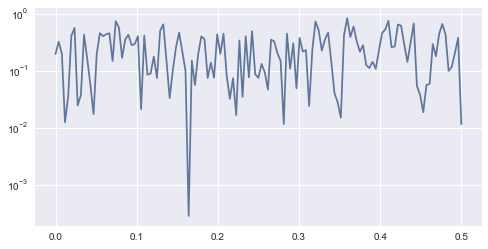

In [112]:
#single calculation check for coherence of Error and Attribute1_lag1 with sampling frequency of 1
f, Cxy = signal.coherence(lag7data_df.Error, lag7data_df.Attribute1_lag1, 1)
plt.semilogy(f, Cxy)
plt.show()


In [113]:
#single calculation of cross-correlation Error and Attribute1_lag1
numpy.correlate(lag7data_df.Error, lag7data_df.Attribute1_lag1)

array([ 20.9])

In [120]:
#loop through and calculate coherence matrix and cross correlation matrix of Error to each lagged attr/feature
coh_matrix = {}
cr_corr_matrix = {}

for col in lag7_df:
        if col != 'Error': #only compare Error to each lagged attribute, not itself
            coh_matrix[col] = signal.coherence(lag7data_df.Error, lag7data_df[col], 1)
            #print('loop=%d', col)
            cr_corr_matrix[col] = numpy.correlate(lag7data_df.Error,lag7data_df[col])
            

C:\Users\Austin\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1233: RuntimeWarning: invalid value encountered in true_divide
  Cxy = np.abs(Pxy)**2 / Pxx / Pyy


In [121]:
#show cross correlation matrix
cr_corr_matrix

{'Attribute1': array([ 0.]),
 'Attribute1_lag1': array([ 20.9]),
 'Attribute1_lag10': array([-5.971]),
 'Attribute1_lag11': array([-7.161]),
 'Attribute1_lag12': array([-14.362]),
 'Attribute1_lag13': array([-0.17]),
 'Attribute1_lag14': array([-16.99]),
 'Attribute1_lag15': array([-8.518]),
 'Attribute1_lag16': array([ 7.745]),
 'Attribute1_lag17': array([-3.027]),
 'Attribute1_lag18': array([ 17.162]),
 'Attribute1_lag19': array([ 15.058]),
 'Attribute1_lag2': array([-2.665]),
 'Attribute1_lag20': array([ 17.548]),
 'Attribute1_lag3': array([-14.411]),
 'Attribute1_lag4': array([ 7.747]),
 'Attribute1_lag5': array([-1.231]),
 'Attribute1_lag6': array([-0.773]),
 'Attribute1_lag7': array([ 10.266]),
 'Attribute1_lag8': array([ 6.544]),
 'Attribute1_lag9': array([ 16.276]),
 'Attribute2': array([ 13.349]),
 'Attribute2_lag1': array([ 8.097]),
 'Attribute2_lag10': array([ 15.429]),
 'Attribute2_lag11': array([ 24.893]),
 'Attribute2_lag12': array([ 6.997]),
 'Attribute2_lag13': array([-

In [123]:
#show coherence matrix
coh_matrix

{'Attribute1': (array([ 0.        ,  0.00390625,  0.0078125 ,  0.01171875,  0.015625  ,
          0.01953125,  0.0234375 ,  0.02734375,  0.03125   ,  0.03515625,
          0.0390625 ,  0.04296875,  0.046875  ,  0.05078125,  0.0546875 ,
          0.05859375,  0.0625    ,  0.06640625,  0.0703125 ,  0.07421875,
          0.078125  ,  0.08203125,  0.0859375 ,  0.08984375,  0.09375   ,
          0.09765625,  0.1015625 ,  0.10546875,  0.109375  ,  0.11328125,
          0.1171875 ,  0.12109375,  0.125     ,  0.12890625,  0.1328125 ,
          0.13671875,  0.140625  ,  0.14453125,  0.1484375 ,  0.15234375,
          0.15625   ,  0.16015625,  0.1640625 ,  0.16796875,  0.171875  ,
          0.17578125,  0.1796875 ,  0.18359375,  0.1875    ,  0.19140625,
          0.1953125 ,  0.19921875,  0.203125  ,  0.20703125,  0.2109375 ,
          0.21484375,  0.21875   ,  0.22265625,  0.2265625 ,  0.23046875,
          0.234375  ,  0.23828125,  0.2421875 ,  0.24609375,  0.25      ,
          0.25390625,  0